# **Projet Data Management : L'analyse du comportement des consommateurs dans le e-commerce.**

Dans le cadre de notre projet, nous avons choisi d'analyser un jeu de données issu de la plateforme Kaggle intitulé “Product Recommendation - Apriori & Causal ML” (https://www.kaggle.com/code/hunter0007/product-recommendation-apriori-causal-ml).

Ce dataset est extrait d'un supermarché en ligne qui regroupe environ 2 millions de transactions. Il permet d'étudier le comportement d'achat des consommateurs dans le secteur du e-commerce.

Notre objectif principal est d'analyser ces données afin de :

* Comprendre les habitudes d'achat des clients
* Analyser les performances des produits
* Étudier la fréquence des commandes par le client
* Repérer les produits les plus populaires


## **1. Choisir un jeu de données**

Dans cette première étape, nous allons importer les bibliothèques nécessaires pour manipuler les données.

Cette ligne importe la bibliothèque **NumPy** qui est utile pour travailler avec des nombres et des tableaux de nombres en Python.

La bibliothèque **Pandas** est l'outil principal pour travailler avec des données en Python, elle va nous servir a manipuler les données.

In [44]:
import numpy as np
import pandas as pd

### Chargement des données

Cette fonction de Pandas lit un fichier CSV (Comma Separated Values) qui est un format courant pour stocker des données tabulaires.

In [45]:
df = pd.read_csv("ECommerce_consumer_behaviour.csv")

Cet attribut du dataframe indique le nombre de lignes et le nombre de colonnes dans notre jeu de données.

In [46]:
df.shape

(2019501, 12)

Cette fonction est un moyen rapide de jeter un coup d'œil aux données brutes et de voir à quoi ressemblent les premières entrées.

In [ ]:
df.head(50)


Cette fonction affiche des informations comme la moyenne, l'écart type, les valeurs minimum et maximum, et les quartiles. C'est utile pour comprendre la distribution des valeurs dans nos colonnes.

In [ ]:
df.describe()

Cette fonction nous donne le nombre total de lignes, le nom de chaque colonne, le nombre de valeurs non nulles dans chaque colonne ce qui aide à identifier les valeurs manquantes et le type de données de chaque colonne par exemple un entier, un texte, etc..

In [ ]:
df.info()

## **2. Phase de préparation des données**

Cette section se concentre sur le nettoyage et la mise en forme de nos données.

#### Identification des valeurs manquantes

Cette partie va identifier où il y a une valeur manquante (NaN) et de False dans le dataframe.

In [ ]:
#identification valeurs manquantes

df.isna().sum()

En appliquant .sum() après .isna(), on compte le nombre de True dans chaque colonne. Le résultat est une série qui indique le nombre total de valeurs manquantes dans chaque colonne de notre DataFrame.

### Remplacement des valeurs manquantes

Cette fonction recherche et remplaces toutes les valeurs par value = 0.

In [ ]:
#remplacer des valeurs manquantes par une valeur définie (0)

df.fillna(value=0, inplace=True)

print(df)

Cet argument modifie le dataframe sans modifier l'original ensuite on affiche le dataframe après le remplacement des valeurs manquantes.

### Vérification d'une valeur spécifique

On sélectionne la colonne df['days_since_prior_order'] du dataframe qui accède aux valeurs.

In [52]:
#vérifier si la valeur n'existe pas déjà dans la colonne 'days_since_prior_order'

existe = '0' in df['days_since_prior_order'].values
print(existe)  # True


False


On vérifie si la chaine de caractères '0' est présente dans la colonne. Si le résultat est #True si '0' est trouvé ou sinon #False alors elle est stocké dans la variable existe.

### Nouvelle vérification et doublons

On répète la vérification des valeurs manquantes avec la fonction print(df.isna().sum) apres l'operation fillna.

La fonction df.duplicated().sum() vérifie si il y a des doublons dans le dataframe.

In [ ]:
#nouvelle vérification
print(df.isna().sum())
print(df.duplicated().sum())

### Vérification des types de données

Dtypes renvoie le type de données de chaque colonne du DataFrame ce qui va nous permettre de vérifier si les données sont dans le format attendu.




In [ ]:
df.dtypes

### Conversion du type de données

Cette fonction sélectionne la colonne days_since_prior_order et utilise la méthode .astype(int) pour convertir son type de données en entier (int).

Le résultat de la conversion est réaffecté à la même colonne et elle remplace les anciennes valeurs avec les nouvelles valeurs converties en entier.

In [ ]:
#Conversion de la colonne 'days_since_prior_order' en int (best practice)
df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)

print(df.dtypes)

In [ ]:
df.head(20)

### Sauvegarde du DataFrame modifié

Cette fonction va sauvegarder un nouveau DataFrame dans un nouveau fichier CSV.

In [57]:
df.to_csv('new_ECommerce_consumer_behaviour.csv', index=False)

In [ ]:
df.head(
)

## **3. Création de variables**


Cette section crée de nouvelles colonnes (variables) dans le DataFrame basées sur les données existantes.

### Première variable : Clients VIP

L'objectif est de marquer les clients qui ont passé plus de 50 commandes comme "VIP".

Nous avons créé une variable binaire Client_VIP pour identifier les clients fidèles que nous avons définis comme ceux ayant passé plus de 50 commandes.

Cette variable permet de repérer les clients les plus actifs ce qui est utile pour nous permettre :

* D'analyser les comportement d'achat,
d'adapter des stratégies de fidélisation,
ou encore classer les clients.
On utilise la condition order_number > 50 pour sélectionner ces clients puis crée une nouvelle colonne où :

1 signifie "client VIP",
0 signifie "client non VIP".
Enfin, nous avons calculé leur part dans la base de données :
14,59 % des clients sont considérés comme VIP.

In [59]:
#VARIABLE 1 - Les clients VIP

#Création d'une colonne binaire (Client récurrent VIP) : 1 si le client a un nb de commandes <50, sinon 0
df['Client_VIP'] = df['user_id'].isin(
    df[df['order_number'] > 50]['user_id']
).astype(int)


In [60]:
pourcentage_clients_recurrents = df['Client_VIP'].mean() * 100
print(f"Pourcentage de clients VIP : {pourcentage_clients_recurrents:.2f}%")

Pourcentage de clients VIP : 14.59%


In [ ]:
df.head()

### Deuxième Variable : Produits Bestsellers

L'objectif est d'identifier les produits qui ont été commandés un très grand nombre de fois (plus de 200 000 fois).

Nous avons créé une variable Produit bestseller pour identifier les produits les plus populaires dans la base de données.

L'idée est simple : On a compté combien de fois chaque produit a été commandé puis on a sélectionné ceux qui apparaissent plus de 200 000 fois soit environ 10 % du total.
Ces produits sont considérés comme des bestsellers.

Une colonne booléenne a été ajoutée :

* True si le produit est un bestseller,
* False sinon.

Cela permet de :

* De repérer les produits les plus demandés,
analyser leur impact dans les commandes,
* Ou d'adapter les stocks et les promotions.

Résultat : 21,72 % des produits commandés appartiennent à la catégorie des bestsellers.

In [62]:
#VARIABLE 2 - Les produits bestsellers

#Compter les occurrences de chaque produit
produit_counts = df['product_id'].value_counts()

#Identifier les produits qui apparaissent plus de 200000 fois (10%)
bestsellers = produit_counts[produit_counts > 200000].index

#Créer la colonne booléenne
df['Produit bestseller'] = df['product_id'].isin(bestsellers)

In [63]:
pourcentage_bestsellers = df['Produit bestseller'].mean() * 100
print(f"Pourcentage de produits bestsellers : {pourcentage_bestsellers:.2f}%")


Pourcentage de produits bestsellers : 21.72%


In [64]:
df.to_csv('new_ECommerce_consumer_behaviour.csv', index=False)

In [ ]:
df.head()

## **4. Visualisation des tendances**


###  Analyse descriptive et comportementale des utilisateurs et des produits

Cette section utilise des graphiques pour explorer les tendances dans nos données.

Ces lignes de code importe la bibliothèque **Matplotlib** est une bibliothèque pour créer des graphiques. La bibliothèque **Seaborn** qui provient de Matplotlib fournit des fonctions de visualisation plus statistiques. **Plotly** est une bibliothèque Python qui sert à créer facilement des graphiques interactifs.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Proportion de Clients VIP (Graphique Circulaire)

Ce graphique en camembert illustre la proportion de clients considérés comme VIP (ayant passé plus de 50 commandes) par rapport aux autres.

On observe que environ 14% des clients sont des clients fidèles tandis que la majorité (environ 85%) sont non VIP.

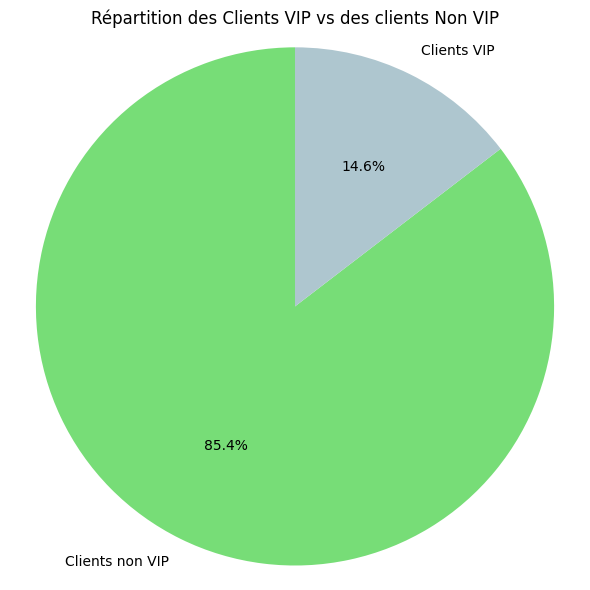

In [67]:
#Calcul des données
pourcentage_vip = df['Client_VIP'].mean() * 100
pourcentage_non_vip = 100 - pourcentage_vip

labels = ['Clients non VIP', 'Clients VIP']
sizes = [pourcentage_non_vip, pourcentage_vip]
colors = ['#77DD77', '#AEC6CF']

#Création du camembert
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Répartition des Clients VIP vs des clients Non VIP')
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Les 10 produits les plus commandés (Graphique à Barres avec Plotly)

Ce graphique à barres représente les 10 produits les plus populaires auprès des clients en fonction du nombre total de commandes.
Chaque barre correspond à un produit et sa hauteur indique combien de fois il a été commandé.

In [68]:

#Préparation des données
top_products = (
    df.groupby('product_name')['user_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='nombre_commandes')
)

#Création du graphique à barres
fig = px.bar(
    top_products,
    x='product_name',
    y='nombre_commandes',
    title='Top 10 des Produits les Plus Commandés',
    color='product_name',
    color_discrete_sequence=[
        '#B0E0E6', '#E9967A', '#77DD77', '#d62728', '#9467bd',
        '#DEB887', '#e377c2', '#7f7f7f', '#bcbd22', '#1982C4'
    ],
    labels={'product_name': 'Nom du produit', 'nombre_commandes': 'Nombre de commandes'},
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Nom du produit',
    yaxis_title='Nombre de commandes',
    showlegend=False,
    height=500,
    width=800,
)

fig.show()


#### Quantité de Produits vendus Bestsellers vs Non-Bestsellers (Graphique en anneau)

Dans ce graphique, on visualise la proportion de produits considérés comme bestseller c'est-à-dire les produits apparaissant plus de 200 000 fois dans le dataset.

On observe que 21,72% des produits entrent dans cette catégorie, tandis que la majorité (environ 78%) sont des produits moins populaires.

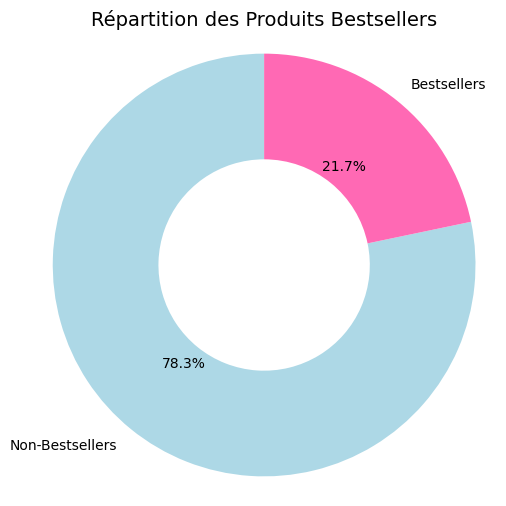

In [69]:
bestseller_counts = df['Produit bestseller'].value_counts()
labels = ['Non-Bestsellers', 'Bestsellers']
sizes = [bestseller_counts.get(False, 0), bestseller_counts.get(True, 0)]
colors = ['lightblue', 'hotpink']

#Graphique en anneau
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'width': 0.5}
)
plt.title('Répartition des Produits Bestsellers', fontsize=14)
plt.axis('equal')
plt.show()


#### Fréquence de Commande moyenne par Client (Histogramme)

Cet histogramme montre la fréquence moyenne (en jours) entre deux commandes pour chaque client.
Chaque barre représente un groupe de clients ayant un délai moyen similaire entre leurs commandes.

* L’axe des X correspond au nombre de jours en moyenne entre les commandes.
* L’axe des Y indique combien de clients ont cette fréquence.
* La courbe (en bleu) correspond à la densité de probabilité (KDE), qui permet de visualiser la tendance globale.

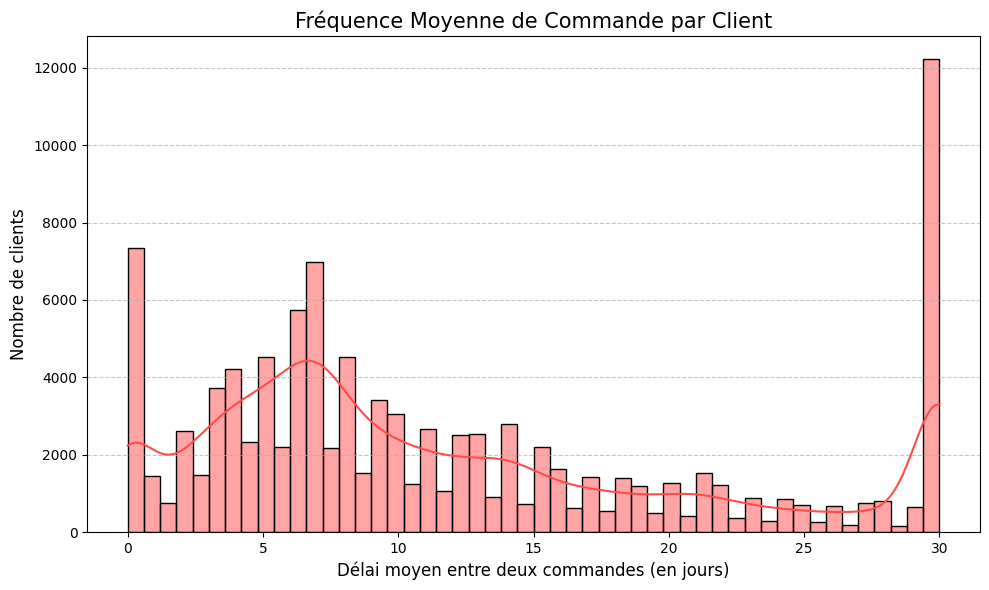

In [70]:
#Calcul de la fréquence moyenne (en jours) entre deux commandes pour chaque client
delai_moyen_par_client = df.groupby('user_id')['days_since_prior_order'].mean()

#Création du graphique
plt.figure(figsize=(10, 6))

sns.histplot(
    delai_moyen_par_client,
    bins=50,
    kde=True,
    color='#FF4C4C'
)

plt.title('Fréquence Moyenne de Commande par Client', fontsize=15)
plt.xlabel('Délai moyen entre deux commandes (en jours)', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Distribution des commandes par heure et jour de la semaine (Graphique à courbe avec Plotly)

Ce graphique aide à comprendre quand les clients commandent le plus ce qui est utile pour optimiser les stocks, la préparation des commandes et l'organisation du service client.

Ce graphique montre comment le nombre de commandes varie selon lheure de la journée et le jour de la semaine. On peut y observer :

* Les heures où les clients passent le plus de commandes : on remarque des pics aux heures où les gens sont actifs (matin, midi, fin d'après-midi).
* La variation selon les jours : certains jours peuvent avoir plus de commandes que d'autres et c'est souvent les jours de semaine vs le week-end.
* Les différences dans les habitudes de commande selon les jours : par ex le lundi peut avoir une courbe différente du samedi.


In [71]:
#calculer le nombre de commandes par jour et heure
commandes_par_jour_heure = (
    df.groupby(['order_dow', 'order_hour_of_day'])
      .size()
      .reset_index(name='nombre_commandes')
)
jours = {0: 'Dim', 1: 'Lun', 2: 'Mar', 3: 'Mer', 4: 'Jeu', 5: 'Ven', 6: 'Sam'}
commandes_par_jour_heure['jour'] = commandes_par_jour_heure['order_dow'].map(jours)

#Création du graphique interactif
fig = px.line(
    commandes_par_jour_heure,
    x='order_hour_of_day',
    y='nombre_commandes',
    color='jour',
    labels={
        'order_hour_of_day': "Heure de la journée",
        'nombre_commandes': "Nombre de commandes",
        'jour': "Jour de la semaine"
    },
    title="Distribution des commandes par heure selon le jour de la semaine"
)

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    legend_title_text='Jour de la semaine'
)

fig.show()

## **5. Partie text mining**

### Analyse d'un article sur l'e-commerce en France.



Dans cette partie, nous analysons un article issu de Statista sur l'évolution du e-commerce en France.(https://fr.statista.com/infographie/32626/evolution-chiffre-affaires-du-e-commerce-et-part-ventes-en-ligne-dans-commerce-de-detail-france/)
Nous avons mis en place des techniques de traitement automatique du langage (TAL) pour identifier les mots clés et visualiser les sujets principaux abordés dans le texte.

#### 1. Importer les bibliothèques

Les bibliothèques que l'on a choisi operent ensemble apportant une fonctionnalité spécifique pour transformer le texte brut en données structurées et exploitables.

In [76]:
import requests
from bs4 import BeautifulSoup
import re
import string
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### 2. Récupération et Nettoyage du Texte Brut (stopwords et stemming)









In [ ]:
#lien
url = "https://fr.statista.com/infographie/32626/evolution-chiffre-affaires-du-e-commerce-et-part-ventes-en-ligne-dans-commerce-de-detail-france/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
texte_brut = soup.get_text()

Le filtrage des Mots Inutiles (Stopwords) : nous avons éliminé les "mots outils" qui n'apportent pas de sens particulier par eux-mêmes (comme "le", "la", "est", "sont", etc.). Pour ca, nous avons combiné une liste standard de mots vides français (de NLTK) avec une liste personnalisée que nous avons définie afin de maximiser la pertinence des mots conservés.

La racinisation des Mots (Stemming) : nous avons appliqué une technique de "stemming" spécifiquement adaptée au français. Le stemming consiste à réduire les mots à leur "racine" commune (par exemple, "vendre", "ventes", "vendu" sont tous réduits à "vent"). L'objectif est de regrouper toutes les formes d'un même mot afin de compter leur importance de manière plus juste.

In [78]:
#stopwords et stemmer

liste_stop_wordswords = ['a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons',
                          'allô', 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au',
                          'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'auraient', 'aurait', 'auront', 'aussi',
                          'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait',
                          'avant', 'avec', 'avoir', 'avons', 'ayant', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'boum',
                          'bravo', 'brrr', "c'", 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là',
                          'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces',
                          'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chacune', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut',
                          'chère', 'chères', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien',
                          'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'c’', "d'", 'da',
                          'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière',
                          'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers',
                          'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire',
                          'directe', 'directement', 'dit', 'dite', 'dits', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dix-neuf',
                          'dix-sept', 'dixième', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'du', 'duquel', 'durant', 'dès',
                          'désormais', 'd’', 'effet', 'egale', 'egalement', 'egales', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en',
                          'encore', 'enfin', 'entre', 'envers', 'environ', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etc', 'etre',
                          'eu', 'euh', 'eux', 'eux-mêmes', 'exactement', 'excepté', 'extenso', 'exterieur', 'fais', 'faisaient', 'faisant', 'fait',
                          'façon', 'feront', 'fi', 'flac', 'floc', 'font', 'gens', 'ha', 'hein', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis',
                          'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'hé', 'hélas', 'i', 'il', 'ils', 'importe',
                          "j'", 'je', 'jusqu', 'jusque', 'juste', 'j’', "l'", 'la', 'laisser', 'laquelle', 'las', 'le', 'lequel', 'les',
                          'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lors', 'lorsque', 'lui', 'lui-meme', 'lui-même', 'là', 'lès', 'l’',
                          "m'", 'ma', 'maint', 'maintenant', 'mais', 'malgre', 'malgré', 'maximale', 'me', 'meme', 'memes', 'merci', 'mes', 'mien', 'mienne',
                          'miennes', 'miens', 'mille', 'mince', 'minimale', 'moi', 'moi-meme', 'moi-même', 'moindres', 'moins', 'mon',
                          'moyennant', 'même', 'mêmes', 'm’', "n'", 'na', 'naturel', 'naturelle', 'naturelles', 'ne', 'neanmoins', 'necessaire',
                          'necessairement', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notamment', 'notre', 'nous', 'nous-mêmes',
                          'nouveau', 'nul', 'néanmoins', 'nôtre', 'nôtres', 'n’', 'o', 'oh', 'ohé', 'ollé', 'olé', 'on', 'ont', 'onze', 'onzième', 'ore',
                          'ou', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'ouvert', 'ouverte', 'ouverts', 'où', 'paf', 'pan', 'par', 'parce', 'parfois',
                          'parle', 'parlent', 'parler', 'parmi', 'parseme', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé',
                          'pendant', 'pense', 'permet', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'pire', 'plein', 'plouf',
                          'plus', 'plusieurs', 'plutôt', 'possessif', 'possessifs', 'possible', 'possibles', 'pouah', 'pour', 'pourquoi', 'pourrais', 'pourrait',
                          'pouvait', 'prealable', 'precisement', 'premier', 'première', 'premièrement', 'pres', 'probable', 'probante', 'procedant', 'proche',
                          'près', 'psitt', 'pu', 'puis', 'puisque', 'pur', 'pure', "qu'", 'quand', 'quant', 'quant-à-soi', 'quanta', 'quarante', 'quatorze',
                          'quatre', 'quatre-vingt', 'quatrième', 'quatrièmement', 'que', 'quel', 'quelconque', 'quelle', 'quelles', "quelqu'un", 'quelque',
                          'quelques', 'quels', 'qui', 'quiconque', 'quinze', 'quoi', 'quoique', 'qu’', 'rare', 'rarement', 'rares', 'relative', 'relativement',
                          'remarquable', 'rend', 'rendre', 'restant', 'reste', 'restent', 'restrictif', 'retour', 'revoici', 'revoilà', 'rien', "s'", 'sa',
                          'sacrebleu', 'sait', 'sans', 'sapristi', 'sauf', 'se', 'sein', 'seize', 'selon', 'semblable', 'semblaient', 'semble', 'semblent',
                          'sent', 'sept', 'septième', 'sera', 'seraient', 'serait', 'seront', 'ses', 'seul', 'seule', 'seulement', 'si', 'sien', 'sienne',
                          'siennes', 'siens', 'sinon', 'six', 'sixième', 'soi', 'soi-même', 'soit', 'soixante', 'son', 'sont', 'sous', 'souvent', 'specifique',
                          'specifiques', 'speculatif', 'stop', 'strictement', 'subtiles', 'suffisant', 'suffisante', 'suffit', 'suis', 'suit', 'suivant',
                          'suivante', 'suivantes', 'suivants', 'suivre', 'superpose', 'sur', 'surtout', 's’', "t'", 'ta', 'tac', 'tant', 'tardive', 'te',
                          'tel', 'telle', 'tellement', 'telles', 'tels', 'tenant', 'tend', 'tenir', 'tente', 'tes', 'tic', 'tien', 'tienne', 'tiennes',
                          'tiens', 'toc', 'toi', 'toi-même', 'ton', 'touchant', 'toujours', 'tous', 'tout', 'toute', 'toutefois', 'toutes', 'treize', 'trente',
                          'tres', 'trois', 'troisième', 'troisièmement', 'trop', 'très', 'tsoin', 'tsouin', 'tu', 'té', 't’', 'un', 'une', 'unes',
                          'uniformement', 'unique', 'uniques', 'uns', 'va', 'vais', 'vas', 'vers', 'via', 'vif', 'vifs', 'vingt', 'vivat', 'vive', 'vives',
                          'vlan', 'voici', 'voilà', 'vont', 'vos', 'votre', 'vous', 'vous-mêmes', 'vu', 'vé', 'vôtre', 'vôtres', 'zut', 'à', 'â', 'ça', 'ès',
                          'étaient', 'étais', 'était', 'étant', 'été', 'être', 'ô','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
                          'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'qu']

liste_stop_words_unidecoded = set(unidecode(sw) for sw in liste_stop_wordswords)

nltk_french_stopwords = set(nltk.corpus.stopwords.words('french'))

all_stop_words = liste_stop_words_unidecoded.union(nltk_french_stopwords)

stemmer = SnowballStemmer("french")

#### 3. Transformation des Données Textuelles (Tokenisation et unidecode)

La normalisation des Caractères (Unidecode) : Nous avons transformé les caractères accentués (comme "é", "à", "ç") en leurs équivalents sans accent (e, a, c). Cette étape est importante pour que le système reconnaisse différentes écritures d'un même mot comme étant les mêmes.

la tokenisation (Découpage des Mots) : Nous avons d'abord décomposé le texte nettoyé en mots individuels que l'on appelle aussi tokens. C'est la base pour pouvoir analyser chaque élément de langage.

In [ ]:
#texte nettoyage et tokenisation

def nettoyer_texte(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zàâçéèêëîïôûùüÿñœ\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_article = nettoyer_texte(texte_brut)

#tokenisation
tokens = cleaned_article.split()

#supprimer les stop words et les mots courts et appliquer unidecode
tokens_filtered = [unidecode(word) for word in tokens if unidecode(word) not in all_stop_words and len(word) > 2]

#stemming
tokens_stemmed = [stemmer.stem(word) for word in tokens_filtered]

#afficher
final_text_for_analysis = ' '.join(tokens_stemmed)

#### 4. Visualisation des Mots Clés (nuage de mots)

Pour une compréhension rapide et visuelle des thèmes dominants, nous avons généré un nuage de mots. Dans cette représentation graphique plus un mot est pertinent et plus il apparaît dans le texte nettoyé et racinisé et il est affiché en grand qui donne un aperçu des sujets principaux de l'article.

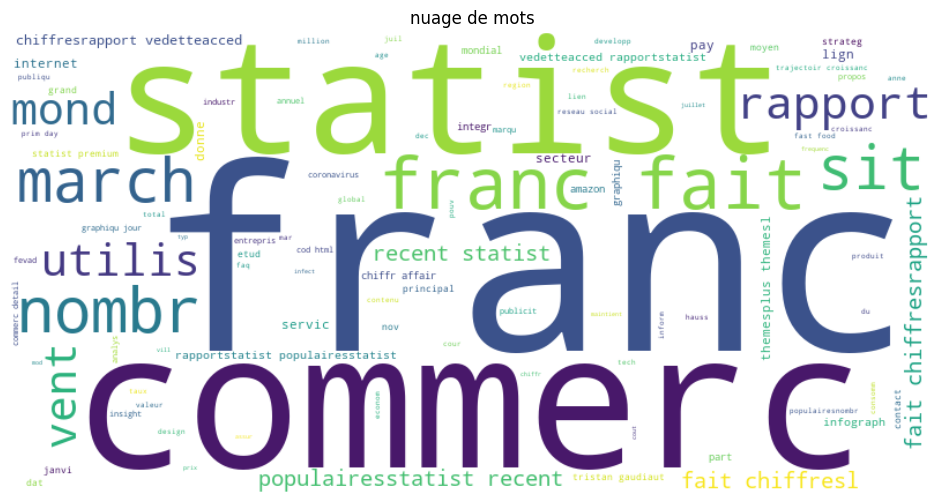

les 100 mots :
['graphiqu', 'commerc', 'maintient', 'trajectoir', 'croissanc', 'franc', 'statistasaut', 'contenu', 'principalstatist', 'frstatist', 'comstatist', 'destatist', 'statist', 'secteurs', 'commercefin', 'assur', 'immobiliermedi', 'publicitebien', 'consommationsocietes', 'produit', 'pharmaceutiquesvoyag', 'tourism', 'hebergementtransport', 'logistiquestatist', 'populairesstatist', 'recent', 'statist', 'populairesnombr', 'infect', 'du', 'coronavirus', 'pay', 'mond', 'janvi', 'coronavirus', 'impact', 'cour', 'indic', 'cac', 'franc', 'popul', 'group', 'age', 'franc', 'janvi', 'principal', 'pay', 'producteur', 'ble', 'mond', 'prix', 'annuel', 'petrol', 'opep', 'themesapercu', 'themesl', 'fast', 'food', 'franc', 'fait', 'chiffresl', 'utilis', 'smartphon', 'franc', 'fait', 'chiffresrapport', 'vedetteacced', 'rapportl', 'secteursstatist', 'populairesstatist', 'recent', 'statist', 'populairesproport', 'utilis', 'reseau', 'social', 'age', 'franc', 'frequenc', 'recour', 'mod', 'livraiso

In [ ]:
#nuage de mots

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(final_text_for_analysis)

#affichage du nuage de mots
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('nuage de mots')
plt.show()

print("les 100 mots :")
print(tokens_stemmed[:100])